In [ ]:
#Group 8 Assingment

In [ ]:
import math
import numpy as np
import matplotlib.pyplot as plt

The following Code block takes the naca series and gives the camber and thickness distribution respectively using the following formulas

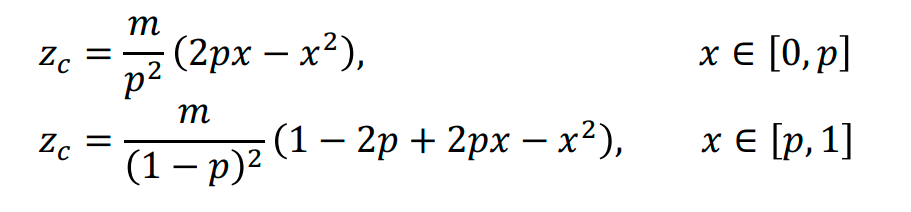

In [ ]:
#Question 1 and 2 ::
#x is Normalized distance
class NACA: 
    def __init__(self, naca):
        self.naca = naca
        
    def Camber_fnc(self,x): 
        m=float(self.naca[0])/100 #Obtaining maximum camber 
        p=float(self.naca[1])/10  #Obtaining location of maximum camber
        if x < p and x>=0:
            z=(m/(p**2))*((2*p*x)-x**2)
            return z
        elif x>=p and x<=1:
            z=(m/((1-p)**2))*(1-(2*p)+(2*p*x)-x**2)
            return z
 
    def thickness(self,x):
        t=float(self.naca[2:4])/100 #Returns the maximum thickness for the given airfoil
        if x>=0 and x<=1:
            thickness= 5*t*(0.2969*x**0.5-0.1260*x-0.3516*x**2+0.2843*x**3-0.1036*x**4)
            return thickness

The code block gives the derivative of a function and uses forward,central and backward difference

In [ ]:
#Question 3 and 4 ::
class derivative(NACA):
    
    def __init__(self, naca):
        super().__init__(naca) 
    
    def derivative_c(self,x): 
        h=0.001
        if x==0:
            #Forward Difference
            #calling camber function
            dzbydx=(super().Camber_fnc(h)-super().Camber_fnc(0))/h 
            return dzbydx
        elif x==1:
            #Backward Difference
            dzbydx=(super().Camber_fnc(1)-super().Camber_fnc(1-h))/h 
            return dzbydx
        else:
            #Central Difference 
            dzbydx=(super().Camber_fnc(x+h)-super().Camber_fnc(x-h))/(2*h) 
            return dzbydx
    
    def derivative_th(self,x):
        h=0.001
        if x==0:
            dzbydx=(super().thickness(h)-super().thickness(0))/h 
            return dzbydx
        elif x==1:
            dzbydx=(super().thickness(1)-super().thickness(1-h))/h 
            return dzbydx
        else:
            dzbydx=(super().thickness(x+h)-super().thickness(x-h))/(2*h) 
            return dzbydx


The function returns Cl and Cm for a given angle of attack 

The coefficient of lift is calculated using the following formulas

Capture3.PNG

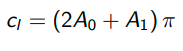

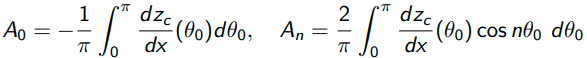

In [ ]:
#Question 5::
class Thin_Airfoil(derivative): 
     def __init__(self, naca):
        super().__init__(naca)  
 
     def Cl_Cm(self,alpha_deg): 
        n=15 # number of divisions Arbitrary choice
        alpha_rad=alpha_deg*(math.pi/180) 
        h=(math.pi)/n
        th=0
        sum1=0
        sum2=0
        sum3=0
 
        for i in range(1,n): 
            th+=h #short hand notation for th=th+h 
            x=0.5*(1-math.cos(th))
            sum1+=super().derivative_c(x)
            sum2+=(super().derivative_c(x)*math.cos(1*th))
            sum3+=(super().derivative_c(x)*math.cos(2*th))
 
 
        x0=0.5*(1-math.cos(0))
        xn=0.5*(1-math.cos(math.pi))
 
       
        final_sum2=(h/2)*(((super().derivative_c(x0))*math.cos(0))+((super().derivative_c(xn))*math.cos(math.pi)))+(h*sum2)
        final_sum3=(h/2)*(((super().derivative_c(x0))*math.cos(2*0))+((super().derivative_c(xn))*math.cos(2*math.pi)))+(h*sum3)
        
        A0=(-1/np.pi)*((h/2)*(super().derivative_c(x0)+super().derivative_c(xn))+(h*sum1))
        A1=(2/np.pi)*final_sum2
        A2=(2/np.pi)*final_sum3
        
        #cl due to camber and aoa
        cl=math.pi*((2*A0)+A1)+(2*math.pi*alpha_rad)
        cm=-(math.pi/4)*(A1-A2) 
        return(cl,cm)
    
     def Coeff_press(self,alpha):
            
        #Camber Contribution
        n=100
        m=float(self.naca[0])/100
        p=float(self.naca[1])/10
        cp_u=np.zeros(n)
        cp_l=np.zeros(n)
        x=np.arange(0,1,0.01)
        theta=np.zeros(len(x))
        for i in range(0,len(x)):
            theta[i]=math.acos(1-(2*x[i]))
        
        A=np.zeros(10)
        thetap=math.acos(1-(2*p))
        r=(math.sin(thetap)-(thetap*math.sin(thetap)))/(math.pi*p**2)
        A[0]=m*((math.cos(thetap))*(1-(math.sin(thetap)-thetap*math.cos(thetap))/(math.pi*p**2))/(1-p)**2)
        A[1]=(m/(1-p)**2)*(1+((math.cos(thetap)/(math.pi*p**2))*(thetap-(math.sin(thetap)/2))))
                  
        #Estimating An's
        for n in range(2,10):
            A[n]=(m*math.cos(thetap))*((math.sin((n-1)*thetap))/(n*(n-1))-(math.sin((n+1)*thetap))/(n*(n+1)))/((math.pi*p**2)*(1-p)**2)
               
        for i in range(1,len(theta)):
            sum1=0
            for j in range(1,10):
                sum1+=A[j]*math.sin(j*theta[i])
            temp=A[0]*(1+math.cos(theta[i]))/math.sin(theta[i])
            cp=(-2)*(temp+sum1)
            cp_u[i]+=cp
            cp_l[i]+=(-cp)
        
        #AoA problem
        n=100
        x=np.arange(0,1,0.01)
        theta=np.zeros(len(x))
        for i in range(0,len(x)):
            theta[i]+=math.acos(1-(2*x[i]))
        cp_u2=np.zeros(n)
        cp_l2=np.zeros(n)
        alphar=alpha*(np.pi/180)
        for i in range(1,n):
            cp=2*alphar*(1+math.cos(theta[i]))/math.sin(theta[i])
            cp_u2[i]+=-cp
            cp_l2[i]+=cp
        
        x=np.zeros(n)
        for i in range(0,n):
            x[i]=0.5*(1-math.cos(theta[i]))
        
        #Thickness problem
        n=100
        cp_u3=np.zeros(n)
        cp_l3=np.zeros(n)
        x_loc=0
        xp=np.zeros(n)
        for i in range(0,n):
            h=(1/n)
            x=0
            sum1=0
            for k in range(1,n):
                if x == x_loc:
                    sum1+=0
                else:
                    sum1+=super().derivative_th(x)/(x_loc-x)
                x+=h
            if x_loc==0:
                final_sum=(h/2)*super().derivative_th(1)/(x_loc-1)+ h*sum1
                cp_u3[i]+=(-2/math.pi)*final_sum
                cp_l3[i]+=(-2/math.pi)*final_sum
            elif x_loc==1:
                final_sum=(h/2)*super().derivative_th(0)/(x_loc-0)+ h*sum1
                cp_u3[i]+=(-2/math.pi)*final_sum
                cp_l3[i]+=(-2/math.pi)*final_sum
            else:
                final_sum=(h/2)*((super().derivative_th(1)/(x_loc-1))+(super().derivative_th(0)/(x_loc-0)))+ h*sum1
                cp_u3[i]+=(-2/math.pi)*final_sum
                cp_l3[i]+=(-2/math.pi)*final_sum
            #X-locations
            xp[i]=x_loc
            x_loc+=h 
        
        cpu_final=np.zeros(100)
        cpl_final=np.zeros(100)
        for i in range(1,100):
            cpu_final[i]+=(cp_u2[i]+cp_u3[i]+cp_u[i])


            cpl_final[i]+=(cp_l2[i]+cp_l3[i]+cp_u[i])
        
        
        cp_xfl=[0.457,0.257,0.167,0.088,0.021,-0.04,-0.097,-0.151,-0.203,-0.254,-0.304,-0.354,-0.403,-0.453,-0.503,-0.554,-0.606,
                -0.66,-0.715,-0.771,-0.83,-0.891,-0.955,-1.022,-1.092,-1.166,-1.246,-1.332,-1.426,-1.531,-1.655,-1.799,-2.08,-2.316,-2.427,
                -2.492,-2.518,-2.516,-2.494,-2.458,-2.415,-2.371,-2.329,-2.295,-2.268,-2.246,-2.213,-2.128,-1.892,-1.351,-0.493,0.412,0.894,
                1,0.959,0.885,0.815,0.758,0.714,0.68,0.654,0.632,0.613,0.595,0.576,0.553,0.511,0.457,0.424,0.396,0.373,0.353,0.336,0.321,0.309,
                0.298,0.288,0.28,0.273,0.267,0.261,0.256,0.251,0.247,0.243,0.24,0.237,0.235,0.233,0.232,0.232,0.234,0.237,0.242,0.251,0.266,
                0.289,0.329,0.457]
        x_xfl=[1,0.9928,0.9799,0.9635,0.9445,0.9235,0.9007,0.8766,0.8512,0.8249,0.7977,0.7699,0.7415,0.7127,0.6836,0.6543,0.6249,0.5955,
                0.5661,0.5368,0.5077,0.4789,0.4505,0.4225,0.3949,0.3678,0.3413,0.3155,0.2904,0.2659,0.2423,0.2195,0.1976,0.1766,0.1566,0.1376,
                0.1197,0.1028,0.0871,0.0726,0.0592,0.0472,0.0364,0.0269,0.0188,0.0121,0.0069,0.0031,0.0008,0,0.0008,0.0031,0.0069,0.0121,0.0188,
                0.0269,0.0364,0.0472,0.0592,0.0726,0.0871,0.1028,0.1197,0.1376,0.1566,0.1766,0.1976,0.2195,0.2423,0.2659,0.2904,0.3155,0.3413,
                0.3678,0.3949,0.4225,0.4505,0.4789,0.5077,0.5368,0.5661,0.5955,0.6249,0.6543,0.6836,0.7127,0.7415,0.7699,0.7977,0.8249,0.8512,
                0.8766,0.9007,0.9235,0.9445,0.9635,0.9799,0.9928,1]
        
        if (alpha==8):
            plt.scatter(xp[5:],cpu_final[5:]) 
            plt.scatter(xp[5:],cpl_final[5:])
            plt.plot(x_xfl,cp_xfl)
            plt.gca().invert_yaxis()
        else:
            plt.plot(xp[5:],cpu_final[5:]) 
            plt.plot(xp[5:],cpl_final[5:])
            plt.gca().invert_yaxis()
        
     

In [ ]:
obj=Thin_Airfoil("4213")

In [ ]:
obj.Cl_Cm(8)

(1.2706925543759984, -0.07451363591302866)

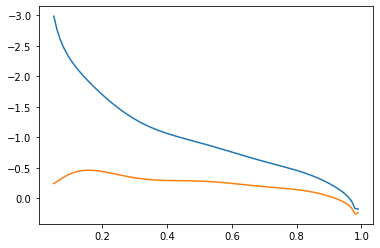

In [ ]:
#Function takes in the AoA








obj.Coeff_press(9)

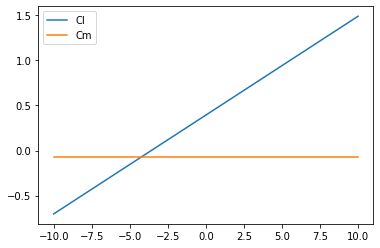

In [ ]:
#Qn 6:
# Cl and Cm for varying AOA

alpha=np.arange(-10,11,1)
cl=np.zeros(len(alpha))
cm=np.zeros(len(alpha))
for i in range(0,len(alpha)):
    cl[i]=obj.Cl_Cm(alpha[i])[0]
    cm[i]=obj.Cl_Cm(alpha[i])[1]
plt.plot(alpha,cl,label="Cl")
plt.plot(alpha,cm,label='Cm')
plt.legend()

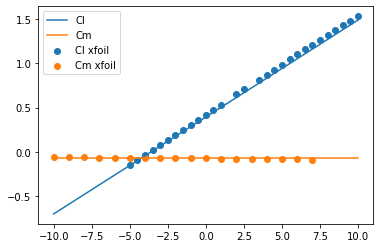

In [ ]:


#Question 7:
alpha=np.arange(-10,11,1)
cl=np.zeros(len(alpha))
cm=np.zeros(len(alpha))
for i in range(0,len(alpha)):
    cl[i]=obj.Cl_Cm(alpha[i])[0]
    cm[i]=obj.Cl_Cm(alpha[i])[1]
plt.plot(alpha,cl,label="Cl")
plt.plot(alpha,cm,label='Cm')

cl_xfl=[-0.1506,-0.0944,-0.0378,0.0185,0.0753,0.1315,0.1887,0.2459,0.3035,0.361,0.4185,0.476,0.5336,0.6488,0.7045,0.8158,0.8702,
0.9211,0.984,1.0514,1.1052,1.1579,1.2117,1.2666,1.3216,1.3766,1.4298,1.4817,1.5329]
alpha_xfl=[-5,-4.5,-4,-3.5,-3,-2.5,-2,-1.5,-1,-0.5,0,0.5,1,2,2.5,3.5,4,4.5,5,5.5,6,6.5,7,7.5,8,8.5,9,9.5,10]

cm_xfl=[-0.0625,-0.0634,-0.0644,-0.0655,-0.0666,-0.0679,-0.0692,-0.0706,-0.0721,-0.0737,-0.0753,-0.077,-0.0788,-0.0807,-0.0826,
        -0.0846,-0.0866,-0.0887]
alpham_xfl=[-10,-9,-8,-7,-6,-5,-4,-3,-2,-1,0,1,2,3,4,5,6,7]


plt.scatter(alpha_xfl,cl_xfl,label="Cl xfoil")
plt.scatter(alpham_xfl,cm_xfl,label="Cm xfoil")
plt.legend()

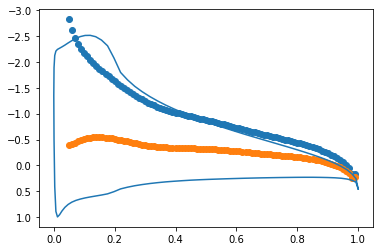

In [ ]:
obj.Coeff_press(8)




